In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)

In [4]:
mask_pos = y == 1
mask_neg = ~mask_pos

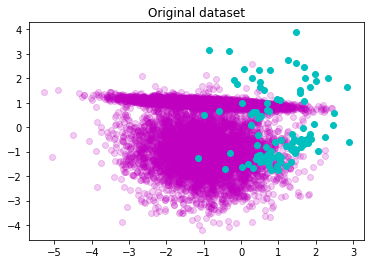

In [6]:
def plot_classes(X, y, title):
    plt.figure()
    plt.scatter(X[:,0][y != 1],X[:,1][y != 1], c="m", alpha=0.2)
    plt.scatter(X[:,0][y == 1],X[:,1][y == 1], c="c")
    plt.title(title)
    plt.show()
plot_classes(X,y, "Original dataset")

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

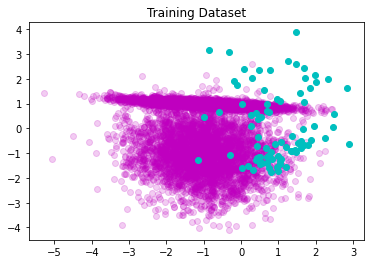

In [9]:
plot_classes(X_train, y_train, "Training Dataset")

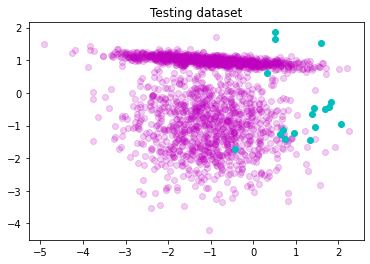

In [10]:
plot_classes(X_test, y_test, "Testing dataset")

In [11]:
from keras.layers import Dense
from keras.models import Sequential

def define_model(n_input):
    # define model
    model = Sequential()
    # define first hidden layer and visible layer 
    model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    # define output layer
    model.add(Dense(1, activation='sigmoid'))
    # define loss and optimizer 
    model.compile(loss='binary_crossentropy', optimizer='sgd') 
    return model

In [23]:
n_input = X_train.shape[1]
model = define_model(n_input)
# fit model
history = model.fit(X_train, y_train, epochs=100, verbose=1) # make predictions on the test dataset


Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.3752
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1167
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0786
Epoch 4/100
250/250 [==============================] - 0s 982us/step - loss: 0.0684
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0613
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0558
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0591
Epoch 8/100
250/250 [==============================] - 0s 845us/step - loss: 0.0539
Epoch 9/100
250/250 [==============================] - 0s 848us/step - loss: 0.0496
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0555
Epoch 11/100
250/250 [==============================] - 0s 920us/step - loss: 0.0484
Epoch 12/100
250/250 [==============================] - 0s 846us/step - loss: 0.0463
Epo

250/250 [==============================] - 0s 1ms/step - loss: 0.0430
Epoch 98/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0404
Epoch 99/100
250/250 [==============================] - 0s 791us/step - loss: 0.0440
Epoch 100/100
250/250 [==============================] - ETA: 0s - loss: 0.044 - 0s 768us/step - loss: 0.0432


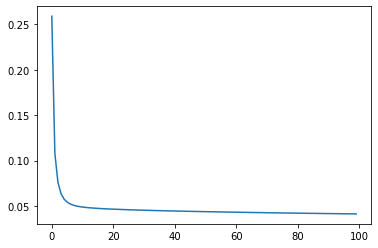

In [24]:
plt.plot(history.history["loss"])

In [13]:
y_pred = model.predict(X_test)
print(y_pred)

[[3.2748282e-03]
 [2.3005985e-05]
 [1.0028270e-01]
 ...
 [9.3159378e-03]
 [4.2951435e-02]
 [3.9121807e-03]]


F1: 0.00  -- prec: 0.00  -- recall: 0.00  -- acc: 0.99
cm:
 [[1983    0]
 [  17    0]]


/Users/rpezoa/opt/anaconda3/envs/root_py/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


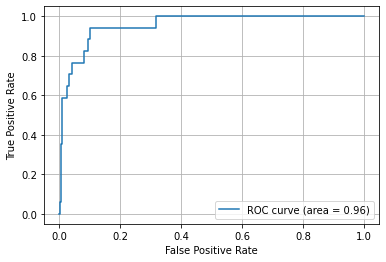

/Users/rpezoa/opt/anaconda3/envs/root_py/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rpezoa/opt/anaconda3/envs/root_py/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rpezoa/opt/anaconda3/envs/root_py/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

,0,1,accuracy,macro avg,weighted avg
precision,0.991500,0.0,0.9915,0.495750,0.983072
recall,1.000000,0.0,0.9915,0.500000,0.991500
f1-score,0.995732,0.0,0.9915,0.497866,0.987268
support,1983.000000,17.0,0.9915,2000.000000,2000.000000


In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def show_metrics(y_test, y_pred):
    fpr, tpr, ths = roc_curve(y_test,  y_pred)
    auc_ = auc(fpr, tpr)
    f1 = f1_score(y_test,  (y_pred>.5))
    prec = precision_score(y_test,  (y_pred>.5))
    rec = recall_score(y_test,  (y_pred>.5))
    acc = accuracy_score(y_test,  (y_pred>.5))
    print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)
    
    cm = confusion_matrix(y_test, y_pred >.5)
    print("cm:\n", cm)

    plt.plot(fpr,tpr, label='ROC curve (area = %.2f)' %auc_)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()
    d = classification_report(y_test, y_pred >.5,output_dict=True)
    display(pd.DataFrame.from_dict(d))
    
    
show_metrics(y_test, y_pred)

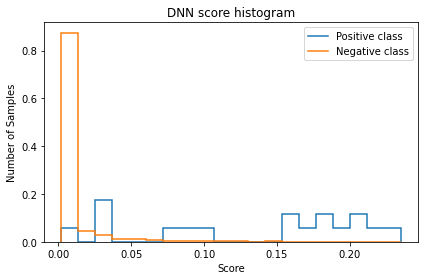

In [15]:
import mplhep as hep
import numpy as np
def plot_scores(y_pred, y_test):
    # Score distribution
    f, axs = plt.subplots(1, 1, sharex=True, sharey=True)
    h_sig_test, bins_sig_test = np.histogram(y_pred[y_test == 1], bins=20)
    h_back_test, bins_back_test = np.histogram(y_pred[y_test == 0], bins=20)
    axs.set_title("DNN score histogram")
    hep.histplot([h_sig_test/h_sig_test.sum(), h_back_test/h_back_test.sum()], bins_sig_test, ax=axs,label=["Positive class", "Negative class"])
    axs.legend()
    axs.set_xlabel("Score")
    axs.set_ylabel("Number of Samples")
    plt.tight_layout()
    plt.show()
plot_scores(y_pred, y_test)

In [16]:
model_2 = define_model(n_input)

weights = {0:1, 1:100}
# fit model

history_2 = model_2.fit(X_train, y_train, epochs=50,  class_weight=weights, verbose=1) # make predictions on the test dataset


Epoch 1/50
250/250 [==============================] - 0s 912us/step - loss: 0.9163
Epoch 2/50
250/250 [==============================] - 0s 858us/step - loss: 0.6575
Epoch 3/50
250/250 [==============================] - 0s 826us/step - loss: 0.9118
Epoch 4/50
250/250 [==============================] - 0s 970us/step - loss: 0.6273
Epoch 5/50
250/250 [==============================] - 0s 830us/step - loss: 0.5714
Epoch 6/50
250/250 [==============================] - 0s 901us/step - loss: 0.6166
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.6373
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5510
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.5419
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.5351
Epoch 11/50
250/250 [==============================] - 0s 970us/step - loss: 0.7519
Epoch 12/50
250/250 [==============================] - 0s 908us/step - loss: 0.5583
Epoch 13/

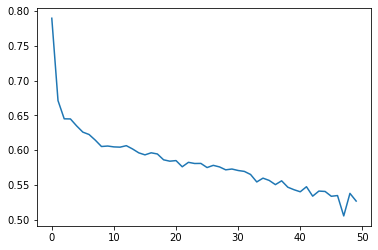

In [22]:
plt.plot(history_2.history["loss"])

In [25]:
y_pred_2 = model_2.predict(X_test)
print(y_pred_2)

[[0.20549405]
 [0.01468271]
 [0.6865347 ]
 ...
 [0.64563245]
 [0.5220079 ]
 [0.15181455]]


F1: 0.12  -- prec: 0.06  -- recall: 0.94  -- acc: 0.88
cm:
 [[1748  235]
 [   1   16]]


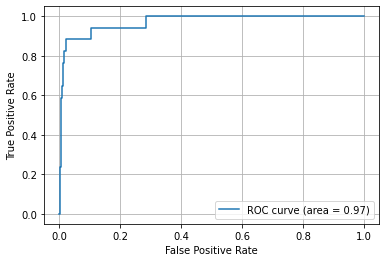

,0,1,accuracy,macro avg,weighted avg
precision,0.999428,0.063745,0.882,0.531587,0.991475
recall,0.881493,0.941176,0.882,0.911335,0.882000
f1-score,0.936763,0.119403,0.882,0.528083,0.929816
support,1983.000000,17.000000,0.882,2000.000000,2000.000000


In [26]:
show_metrics(y_test, y_pred_2)

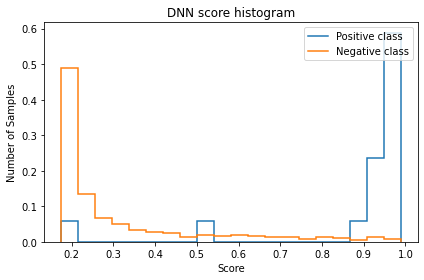

In [27]:
plot_scores(y_pred_2, y_test)

In [29]:
weights = {0:1, 1:50}

model_3 = define_model(n_input)
# fit model
history_3 = model_3.fit(X_train, y_train, epochs=50,  class_weight=weights, verbose=1) # make predictions on the test dataset



Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1.3568
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5342
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4378
Epoch 4/50
250/250 [==============================] - 0s 898us/step - loss: 0.5174
Epoch 5/50
250/250 [==============================] - 0s 920us/step - loss: 0.4519
Epoch 6/50
250/250 [==============================] - 0s 968us/step - loss: 0.4558
Epoch 7/50
250/250 [==============================] - 0s 946us/step - loss: 0.4039
Epoch 8/50
250/250 [==============================] - 0s 864us/step - loss: 0.4506
Epoch 9/50
250/250 [==============================] - 0s 920us/step - loss: 0.3966
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3558
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3988
Epoch 12/50
250/250 [==============================] - 0s 989us/step - loss: 0.4170
Epoch 13/50

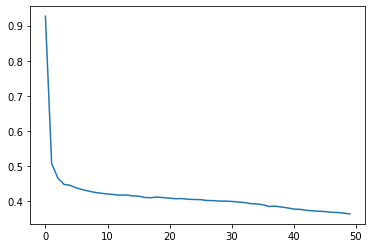

In [30]:
plt.plot(history_3.history["loss"])

F1: 0.21  -- prec: 0.12  -- recall: 0.88  -- acc: 0.94
cm:
 [[1871  112]
 [   2   15]]


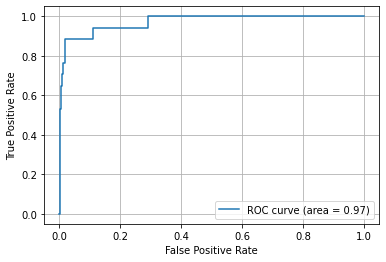

,0,1,accuracy,macro avg,weighted avg
precision,0.998932,0.118110,0.943,0.558521,0.991445
recall,0.943520,0.882353,0.943,0.912936,0.943000
f1-score,0.970436,0.208333,0.943,0.589385,0.963958
support,1983.000000,17.000000,0.943,2000.000000,2000.000000


In [31]:
y_pred_3 = model_3.predict(X_test)
show_metrics(y_test, y_pred_3)

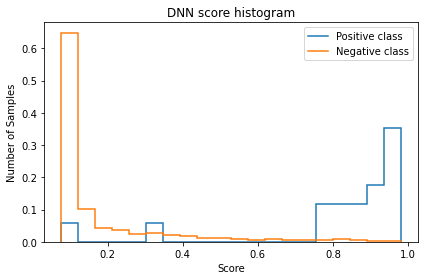

In [32]:
plot_scores(y_pred_3, y_test)

In [33]:
weights = {0:1, 1:10}

model_4 = define_model(n_input)
# fit model
history_4 = model_4.fit(X_train, y_train, epochs=50,  class_weight=weights, verbose=1) # make predictions on the test dataset




Epoch 1/50
250/250 [==============================] - 0s 848us/step - loss: 0.6495
Epoch 2/50
250/250 [==============================] - 0s 946us/step - loss: 0.2746
Epoch 3/50
250/250 [==============================] - 0s 871us/step - loss: 0.2613
Epoch 4/50
250/250 [==============================] - 0s 886us/step - loss: 0.2041
Epoch 5/50
250/250 [==============================] - 0s 876us/step - loss: 0.2092
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1967
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1740
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1907
Epoch 9/50
250/250 [==============================] - 0s 903us/step - loss: 0.1632
Epoch 10/50
250/250 [==============================] - 0s 862us/step - loss: 0.1689
Epoch 11/50
250/250 [==============================] - 0s 840us/step - loss: 0.1902
Epoch 12/50
250/250 [==============================] - 0s 912us/step - loss: 0.1891
Epoch 1

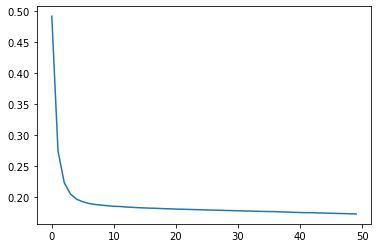

F1: 0.33  -- prec: 0.22  -- recall: 0.65  -- acc: 0.98
cm:
 [[1944   39]
 [   6   11]]


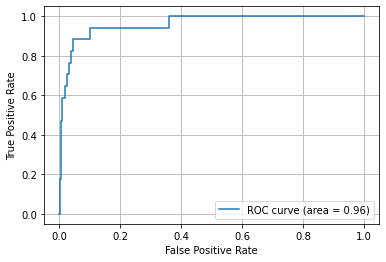

,0,1,accuracy,macro avg,weighted avg
precision,0.996923,0.220000,0.9775,0.608462,0.990319
recall,0.980333,0.647059,0.9775,0.813696,0.977500
f1-score,0.988558,0.328358,0.9775,0.658458,0.982947
support,1983.000000,17.000000,0.9775,2000.000000,2000.000000


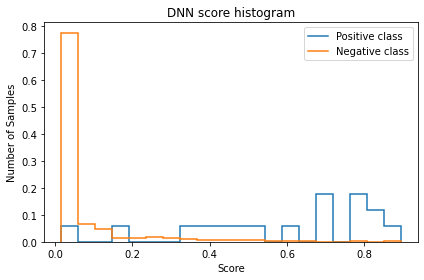

In [35]:
plt.figure()
plt.plot(history_4.history["loss"])
plt.show()
y_pred_4 = model_4.predict(X_test)
show_metrics(y_test, y_pred_4)
plot_scores(y_pred_4, y_test)